# Cyber Security Attacks Model

The model is supposed to predict a cyber attack type based on user input.

Questions:
- What user input? Which fields can they input? Presumably all fields that are going to be used in final dataset.

In [9]:
import pandas as pd

pd.options.display.max_columns = None

## Data Loading

In [66]:
df_base = pd.read_csv("../data/cybersecurity_attacks.csv")
df_base.head(3)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall


## Exploration

In [20]:
df_base.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [27]:
print(df.nunique())

Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Source Port               29761
Destination Port          29895
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            1
Anomaly Scores             9826
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          32389
Device Information        32104
Network Segment               3
Geo-location Data          8723
Proxy Information         20148
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64


In [24]:
df.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [5]:
dups = df.duplicated()
dups[dups == True]

Series([], dtype: bool)

In [21]:
df_base["Payload Data"].tolist()[10000:10010]

['Eos eligendi occaecati impedit reprehenderit. Mollitia fugit ipsa a. Pariatur reprehenderit impedit quae cum. Amet nihil doloremque.',
 'Ipsa nam sequi ducimus nam fugit. Harum enim veniam.\nIste exercitationem natus temporibus inventore inventore ipsam. Nesciunt temporibus eaque ad odio nihil. Nihil aliquid et blanditiis.',
 'Deleniti quidem tenetur voluptates placeat corporis consectetur. Inventore illo sunt rem ipsam numquam.\nVoluptatibus ad facilis voluptas aperiam a quae. Laboriosam et beatae necessitatibus iste.',
 'Libero illo cupiditate sit. Ipsam recusandae dolores at deserunt.\nPraesentium sed sunt nihil. Veniam sint eum quisquam nesciunt deserunt officia.',
 'Nisi consectetur impedit accusamus aperiam. Quibusdam ea quas incidunt.\nDeleniti quidem suscipit cumque quae. Quidem eligendi natus est similique. Occaecati optio eum rem et deleniti.',
 'Asperiores dolorem nisi. Eligendi aperiam minus laboriosam.\nAliquam esse numquam architecto saepe in.\nProvident accusantium qua

In [23]:
df_base["Malware Indicators"].unique().tolist()

['IoC Detected', nan]

In [65]:
df_corr = df.drop(columns=['Timestamp','Source IP Address','Destination IP Address'])
plt.figure(figsize=(10,10))
sns.heatmap(df_corr.corr(),annot=True)
plt.show()

ValueError: could not convert string to float: 'ICMP'

<Figure size 1000x1000 with 0 Axes>

In [62]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df[df["Attack Type"]=="Malware"], y=df['Packet Length'], palette="coolwarm")
# sns.boxplot(x=df.filter('Attack Type'=='Malware'), y=df['Packet Length'], palette="coolwarm")
plt.title("Packet Length vs Attach Type")
plt.show()

ValueError: 2

<Figure size 800x500 with 0 Axes>

In [54]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    print(f"Valores extremos da coluna {col}:")
    print("Mínimo:", df[col].min())
    print("Máximo:", df[col].max())
    print("-----------")

Valores extremos da coluna Source Port:
Mínimo: 1027
Máximo: 65530
-----------
Valores extremos da coluna Destination Port:
Mínimo: 1024
Máximo: 65535
-----------
Valores extremos da coluna Packet Length:
Mínimo: 64
Máximo: 1500
-----------
Valores extremos da coluna Anomaly Scores:
Mínimo: 0.0
Máximo: 100.0
-----------


## Analysis

- No duplicated rows.

Based on the data, some columns are NOT valuable for model training:
- the 2 IP Address columns. The reason is because they are going to be unique and might be too "random". However, we can probably extract data from the IP address that would be more useful. According to https://ipinfo.io/blog/ip-address-information, we can get information like location, ISP, network info (ASN and its type - ASN is a block of IPs owned by an org, hostname, number of domains on IP, privacy detection - coming from VPN or proxy).
- Payload Data seems fairly useless. It looks like irrelevant latin text - possibly auto-generated.

IDS/IPS NEEEEEEEEED.


## Need Clarity

- From whose perspective is the data from? The attacker?
- Is timestamp using UTC time or some other uniform time zone?
- Are countries relevant? Because we don't know if the data collection is concentrated in a certain area. Model results can be skewed.
- Ports above a certain value can be used for anything unlike the ports below that threshold. Can we assume that the ports selected are randomly assigned by the attacker?
- Columns liks Action Taken has data from after the attack but they may not know what type of attack it is initially. With that data, we can figure out the type after the attack happened.
- What are Anomaly Score? Not sure which part of the process it is in. How does it relate to Attack Signatures?

## Extra Checks

- Packet Type has some relation to Protocol. Do some more checks to make sure.
- More checks on Packet Length.
- Check which values from some other column are paired with Malware Indicators.

## TODO
- Extract browser, OS with version from Device Info. Find out the format of the Device Info column.

In [49]:
df_base["Hourly"] = pd.to_datetime(df["Timestamp"]).dt.hour
df_base

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,hourly,Hourly
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server,6,6
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall,7,7
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,8,8
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall,10,10
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,IoC Detected,39.28,NaN,DDoS,Known Pattern A,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall,14,14
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,IoC Detected,27.25,NaN,DDoS,Known Pattern A,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall,0,0
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,IoC Detected,31.01,NaN,DDoS,Known Pattern B,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server,1,1
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,IoC Detected,97.85,Alert Triggered,Malware,Known Pattern B,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server,18,18


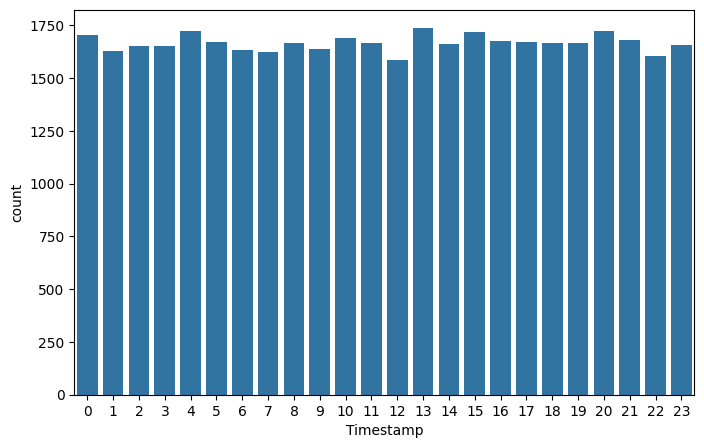

In [40]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x=df_base,y=)
plt.title("")
plt.show()